<a href="https://colab.research.google.com/github/ShubhamN56/PROJECTS/blob/main/RegKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression with keras


In [ ]:
url1="/content/PowerPlant.csv"
url1

'/content/PowerPlant.csv'

#### DATA INGESTION

In [ ]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target - PE(Power output in megwatts)
#----------------------------------------------
### AT - Atmospheric temperature in degree celsius
### v - vacuum pressure of boiler
### AP - Atmospheri pressure
### RH - Relative Humidity in percentage

In [ ]:
##### 2 BASIC DATA QUALITY CHECK


df.duplicated().sum()

np.int64(41)

In [ ]:
### remove duplicateed value

df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### 3. SEPERATE X and Y

In [ ]:
x = df.drop(columns=["PE"])
y=df[["PE"]]

In [ ]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


#### 4. Apply Preprocessing on x

In [ ]:
x.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")


In [ ]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### 5. TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [ ]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [ ]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
xtrain.shape

(7621, 4)

### 6. Build NUERAL NETWORK

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input

#INITIALIZE THE NEURAL NETWORK

model = Sequential()

# add Input Layer(COLUMNS of xtrain)

model.add(Input(shape=(xtrain.shape[1],)))

# add HIDDEN layer 1

model.add(Dense(units=8, activation="relu"))

# add Hidden Layer 2

model.add(Dense(units=4, activation="relu"))

# Output layer

model.add(Dense(units=1,activation="linear"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="mse", optimizer='adam', metrics=["mae"]
              )

In [ ]:
hist = model.fit(xtrain, ytrain, validation_split=0.2,epochs=100)


Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 206572.1094 - mae: 454.1949 - val_loss: 203396.8125 - val_mae: 450.6949
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202058.0156 - mae: 449.2426 - val_loss: 190210.5625 - val_mae: 435.9189
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 184267.3438 - mae: 428.9277 - val_loss: 155789.5781 - val_mae: 393.9478
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 144768.5938 - mae: 378.9476 - val_loss: 105257.3984 - val_mae: 320.1719
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 94155.3047 - mae: 300.0105 - val_loss: 59013.7852 - val_mae: 226.7375
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51706.8750 - mae: 208.6854 - val_loss: 33276.6250 - val_mae: 157.5470
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30948.5938 - mae: 152.0017 - val_loss: 24207.0566 - val_mae: 133.3905
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23545.4238 - 

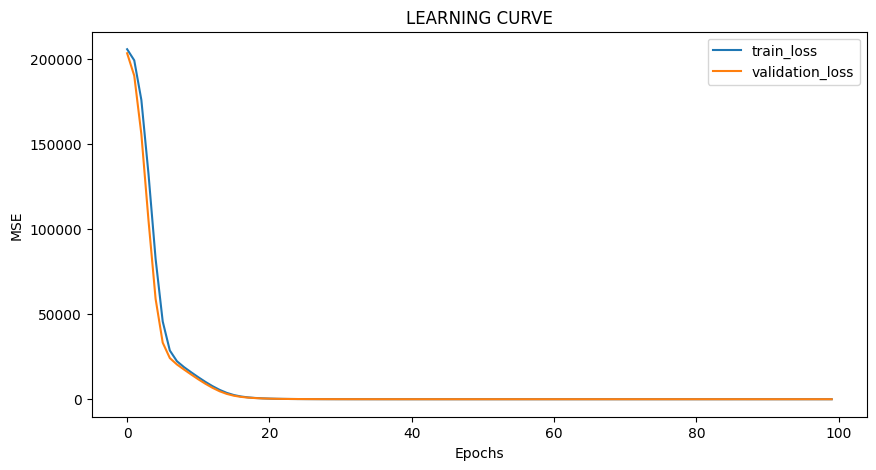

In [ ]:
# plot the curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="train_loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.xlabel("Epochs")
plt.title("LEARNING CURVE")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model

model.evaluate(xtrain,ytrain)



239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.9732 - mae: 3.5604


[20.303173065185547, 3.5648016929626465]

In [ ]:
model.evaluate(xtest,ytest)



60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.1563 - mae: 3.5146


[20.38799476623535, 3.6088783740997314]

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
ypred_train[0:5]


array([[452.1382 ],
       [478.3793 ],
       [468.63382],
       [432.3997 ],
       [466.73932]], dtype=float32)

In [ ]:
ytrain[0:5]

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [ ]:
ypred_test[0:5]


array([[427.20206],
       [481.47742],
       [482.8055 ],
       [450.46356],
       [448.25925]], dtype=float32)

In [ ]:
ytest[0:5]

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9293618202209473

In [ ]:
r2_score(ytest, ypred_test)

0.9324430227279663

In [ ]:
### out of Sample prediction

url2="/content/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908
...,...,...,...,...
95,0.898948,1.197147,-0.805877,-0.196139
96,-1.058331,-1.129893,-0.314313,0.658261
97,-1.885843,-1.017956,1.291690,0.881445
98,0.712221,1.631496,-0.839546,0.491899


In [ ]:
pred = model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[446.1813 ],
       [439.92795],
       [431.64282],
       [440.62436],
       [473.38525]], dtype=float32)

In [ ]:
xnew["PE_Pred"]=pred.round(3)
xnew

,AT,V,AP,RH,PE_Pred
0,22.49,58.82,1009.73,85.19,446.181000
1,28.88,54.89,1007.16,46.60,439.928009
2,27.89,73.21,1001.32,85.88,431.643005
3,25.69,62.26,1011.38,74.08,440.623993
4,12.16,40.81,1025.79,70.97,473.385010
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.933990
96,11.78,39.96,1011.37,82.95,472.296997
97,5.62,41.38,1020.91,86.21,483.824005
98,24.96,74.99,1008.25,80.52,437.871002


In [ ]:
xnew.to_csv("Result.csv")

In [ ]:
## Save model

model.save("powermodel.keras")


In [ ]:

from keras.models import load_model
m=load_model("/content/powermodel.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)